In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import plotly.express as px
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load dataset
data = pd.read_csv('student_depression_dataset.csv')
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [4]:
data.shape

(27901, 18)

In [5]:
data.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [6]:
print( data['Sleep Duration'].unique())

["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


In [7]:
# Define a function to extract numeric hours from Sleep Duration column
def extract_hours(s):
    # Find a number (including decimals)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

data['Sleep Duration'] = data['Sleep Duration'].apply(extract_hours)

In [8]:
print( data['Sleep Duration'].head())

0    5.0
1    5.0
2    5.0
3    7.0
4    5.0
Name: Sleep Duration, dtype: float64


In [10]:
print( data['Sleep Duration'].unique())

[ 5.  7.  8. nan]


In [11]:
print( data['Financial Stress'].unique())

['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [12]:
data['Financial Stress'] = data['Financial Stress'].map({'1.0':1, '2.0':2, '5.0':5, '3.0':3, '4.0':4, '?':0})

In [13]:
# Verify changes
print(data[[ 'Financial Stress']].head())

   Financial Stress
0                 1
1                 2
2                 1
3                 5
4                 1


In [14]:
for col in ['Sleep Duration']:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

In [15]:
print( data['Sleep Duration'].unique())
print(data['Financial Stress'].unique())

[5. 7. 8.]
[1 2 5 3 4 0]


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  float64
 11  Di

In [17]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5.0,Healthy,B.Pharm,Yes,3.0,1,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5.0,Moderate,BSc,No,3.0,2,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,5.0,Healthy,BA,No,9.0,1,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7.0,Moderate,BCA,Yes,4.0,5,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5.0,Moderate,M.Tech,Yes,1.0,1,No,0


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Depression', data=data, palette="viridis")
plt.title("Distribution of Depression among Students")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=data, palette="Set2")
plt.title("Depression Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.show()

num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
data[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
            'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

fig = px.scatter(data, x="CGPA", y="Study Satisfaction", color="Depression",
                 hover_data=['Age', 'Gender', 'Academic Pressure'],
                 title="CGPA vs Study Satisfaction by Depression")
fig.show()

data['Total Pressure'] = data['Academic Pressure'] + data['Work Pressure']

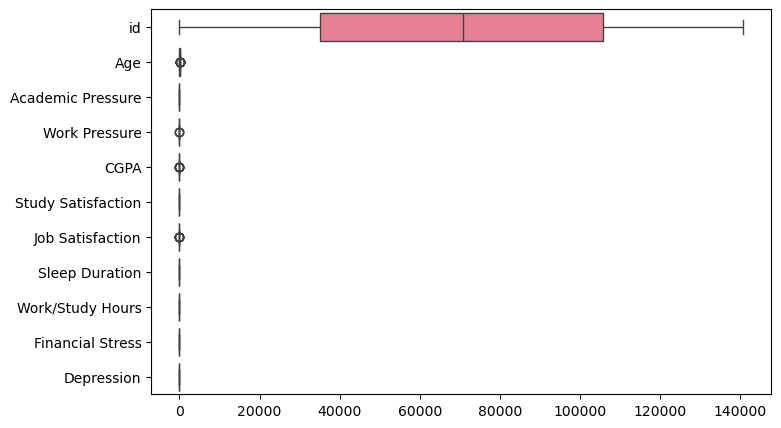

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data,orient='h')
plt.show()

In [15]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Total Pressure
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5.0,Moderate,BSc,No,3.0,2.0,Yes,0,2.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,5.0,Healthy,BA,No,9.0,1.0,Yes,0,3.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7.0,Moderate,BCA,Yes,4.0,5.0,Yes,1,3.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5.0,Moderate,M.Tech,Yes,1.0,1.0,No,0,4.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  float64
 11  Di

In [20]:
cat = data.select_dtypes(include='object').columns

In [21]:
le = LabelEncoder()
for i in cat:
    data[i] = le.fit_transform(data[i])

data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,5.0,0,4,1,3.0,1,0,1
1,8,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,5.0,1,11,0,3.0,2,1,0
2,26,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,5.0,0,6,0,9.0,1,1,0
3,30,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,7.0,1,8,1,4.0,5,1,1
4,32,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,5.0,1,17,1,1.0,1,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int32  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  int32  
 4   Profession                             27901 non-null  int32  
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  float64
 11  Di

In [23]:
num = data.select_dtypes(include=['int64','int32','float64']).columns

In [24]:
for i in num:
    data[i] = data[i].astype('int64')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   id                                     27901 non-null  int64
 1   Gender                                 27901 non-null  int64
 2   Age                                    27901 non-null  int64
 3   City                                   27901 non-null  int64
 4   Profession                             27901 non-null  int64
 5   Academic Pressure                      27901 non-null  int64
 6   Work Pressure                          27901 non-null  int64
 7   CGPA                                   27901 non-null  int64
 8   Study Satisfaction                     27901 non-null  int64
 9   Job Satisfaction                       27901 non-null  int64
 10  Sleep Duration                         27901 non-null  int64
 11  Dietary Habits              

In [26]:
data.head(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33,51,12,5,0,8,2,0,5,0,4,1,3,1,0,1
1,8,0,24,5,12,2,0,5,5,0,5,1,11,0,3,2,1,0


In [28]:
X = data.drop(['id','Depression'],axis=1)
y = data['Depression']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RFC, param_grid=param_grid,
    cv=3, n_jobs=-1, verbose=2, scoring='f1'
)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.8731311312927611


In [34]:
RFC = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [37]:
y_pred = RFC.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [38]:
pred = RFC.predict(X_train)
pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [40]:
conf = confusion_matrix(y_test,y_pred)

conf

array([[1829,  514],
       [ 426, 2812]], dtype=int64)

In [42]:
accuracy_score(y_train,pred)

0.9551075268817204

In [41]:
accuracy_score(y_test,y_pred)

0.8315714029743774

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.83      5581
weighted avg       0.83      0.83      0.83      5581



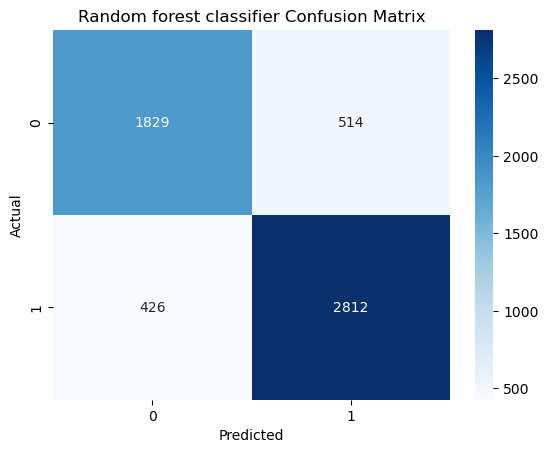

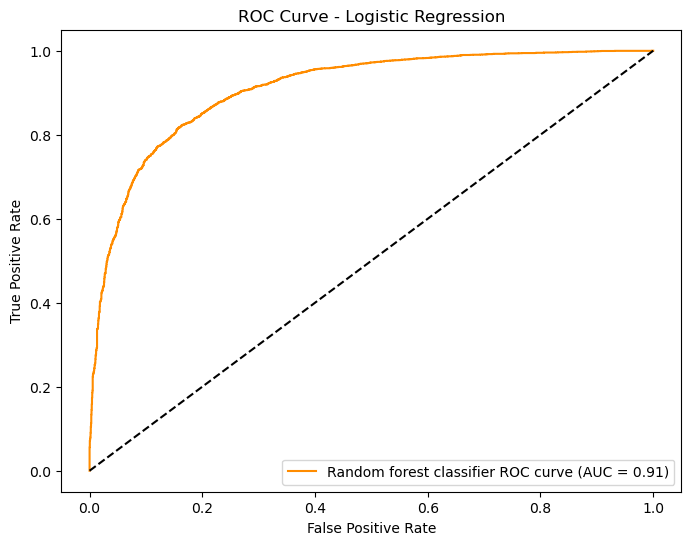

In [48]:
# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred)

#  Heatmap
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues')
plt.title("Random forest classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob_log = RFC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random forest classifier ROC curve (AUC = {roc_auc_log:.2f})', color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [50]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy for Random Forest:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())

5-Fold CV Accuracy for Random Forest: [0.83802186 0.84247312 0.83530466 0.83835125 0.84767025]
Mean CV Accuracy: 0.8403642286071727


In [51]:
import pickle
with open("depression_model.pkl", "wb") as file:
    pickle.dump(RFC, file)

print("✅ Model saved!")

✅ Model saved!
